# 综述

特征重要性分析可以识别并关注最具信息量的特征，从而带来以下几个优势:
- 改进的模型性能
- 减少过度拟合
- 更快的训练和推理
- 增强的可解释性

不同的特征重要性方法有时可以识别出不同的特征是最重要的，原因是
- 他们用不同的方式衡量重要性。有的使用不同特特征进行预测，监控精度下降；像XGBOOST或者回归模型使用内置重要性来进行特征的重要性排列；而PCA着眼于方差解释
- 不同模型有不同模型的方法。线性模型倾向于线性关系，树模型倾向于非线性有增益的特征
- 交互作用。有的方法可以获取特征之间的相互左右，而有一些则不行，这就会导致结果的差异
- 不稳定。使用不同的数据子集，重要性值可能在同一方法的不同运行中有所不同，这是因为数据差异决定的
- Hyperparameters。通过调整超参数，如PCA组件或树深度，也会影响结果，所以不同的假设、偏差、数据处理和方法的可变性意味着它们并不总是在最重要的特征上保持一致

选择特征重要性分析方法的一些最佳实践
- 尝试多种方法以获得更健壮的视图
- 聚合结果的集成方法
- 更多地关注相对顺序，而不是绝对值
- 差异并不一定意味着有问题，检查差异的原因会对数据和模型有更深入的了解

# 排列重要性 Permutation Importance

Permutation Importance是一种特征重要性评估方法，它通过随机重排单个特征的值来计算该特征对模型性能的影响。具体来说，它首先计算模型在原始数据上的性能得分，然后随机重排一个特征的值，并计算模型在重排后的数据上的性能得分。该特征的重要性得分等于模型在重排后的数据上的性能得分与原始数据上的性能得分之差。这个过程对每个特征都进行一次，以计算每个特征的重要性得分。Permutation Importance是一种模型无关的方法，可以用于评估任何类型的监督学习模型的特征重要性。

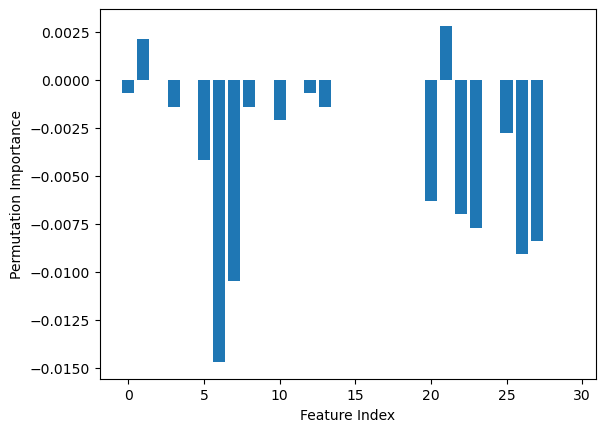

In [4]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the random forest classifier to the training data
rf.fit(X_train, y_train)

# Calculate the baseline accuracy score of the random forest classifier on the testing data
baseline = rf.score(X_test, y_test)

# Calculate the permutation importances of each feature using the random forest classifier and the testing data
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=1, scoring='accuracy')

# Get the mean permutation importances of each feature
importances = result.importances_mean

# Visualize the permutation importances of each feature using a bar chart
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Permutation Importance')
plt.show()

# 内置特征重要性(coef_或feature_importances_)

一些模型，如线性回归和随机森林，可以直接输出特征重要性分数，这些显示了每个特征对最终预测的贡献

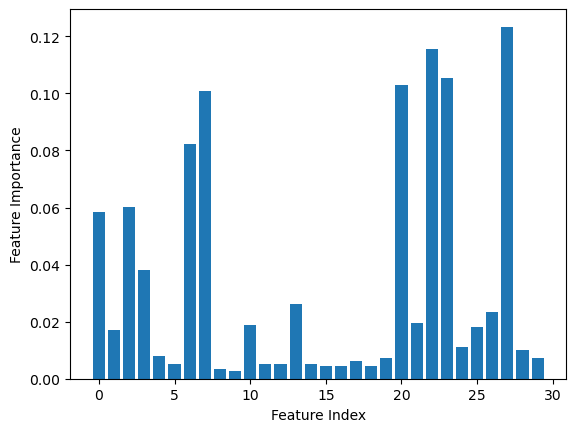

In [7]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the random forest classifier to the dataset
rf.fit(X, y)

# Get the feature importances from the random forest classifier
importances = rf.feature_importances_

# Visualize the feature importances using a bar chart
plt.bar(range(X.shape[1]), importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()

# Leave-one-out

Leave-one-out是一种特征重要性评估方法，它的原理是对每个特征进行一次排除，重新训练模型，并计算模型在排除该特征后的性能得分。具体来说，对于每个特征，Leave-one-out方法将该特征从训练数据中删除，重新训练模型，并在测试数据上计算模型的性能得分。然后，它计算模型在删除该特征后的性能得分与原始性能得分之间的差异，作为该特征的重要性得分。这个过程对每个特征都进行一次，以计算每个特征的重要性得分。

Leave-one-out方法的优点是可以准确地评估每个特征对模型性能的影响，因为它考虑了每个特征的所有可能组合。但是，它的计算成本很高，因为需要对每个特征进行一次重新训练和测试。因此，Leave-one-out方法通常只用于特征数量较少的数据集。

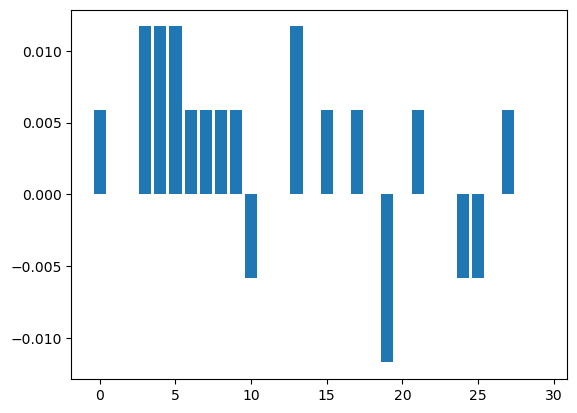

In [8]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load sample data
X, y = load_breast_cancer(return_X_y=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Get baseline accuracy on test data
base_acc = accuracy_score(y_test, rf.predict(X_test))

# Initialize empty list to store importances
importances = []

# Iterate over all columns and remove one at a time
for i in range(X_train.shape[1]):
    X_temp = np.delete(X_train, i, axis=1)
    rf.fit(X_temp, y_train)
    acc = accuracy_score(y_test, rf.predict(np.delete(X_test, i, axis=1)))
    importances.append(base_acc - acc)
    
# Plot importance scores    
plt.bar(range(len(importances)), importances)
plt.show()

# 相关性分析

计算各特征与目标变量之间的相关性，相关性越高的特征越重要

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Axes: >

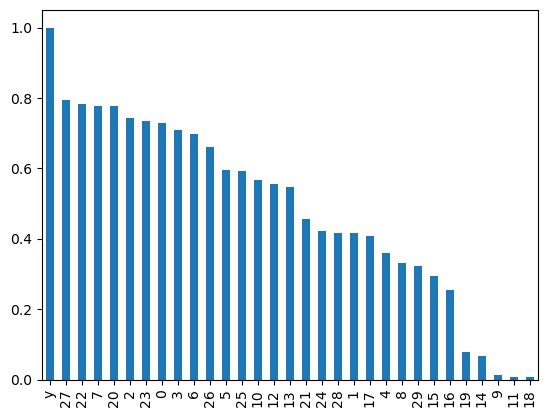

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns=range(30))
df['y'] = y

# Calculate the absolute correlation between each feature and the target variable
correlations = df.corrwith(df.y).abs()

# Sort the correlations in descending order
correlations.sort_values(ascending=False, inplace=True)

# Visualize the correlations using a bar chart
correlations.plot.bar()

# 递归特征消除 Recursive Feature Elimination

递归特征消除（Recursive Feature Elimination，RFE）是一种特征选择方法，它的原理是反复训练模型并消除最不重要的特征，直到达到指定的特征数量。具体来说，递归特征消除方法首先训练一个模型，然后计算每个特征的重要性得分。接下来，它消除得分最低的特征，并重新训练模型。然后，它再次计算每个特征的重要性得分，并消除得分最低的特征。这个过程一直重复，直到达到指定的特征数量为止。

递归特征消除方法的优点是可以准确地评估每个特征对模型性能的影响，并选择最重要的特征。但是，它的计算成本很高，因为需要反复训练模型和计算特征重要性得分。因此，递归特征消除方法通常只用于特征数量较少的数据集。

In [10]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns=range(30))
df['y'] = y

# Create a random forest classifier
rf = RandomForestClassifier()

# Create a recursive feature elimination object with 10 features
rfe = RFE(rf, n_features_to_select=10)

# Fit the recursive feature elimination object to the dataset
rfe.fit(X, y)

# Print the feature ranking
print(rfe.ranking_)

[ 3  4  1  1 12 10  1  1 21 16  7 18 11  2 15 14 17 13 20 19  1  1  1  1
  5  8  1  1  6  9]


# XGBoost特性重要性

XGBoost是一种基于决策树的集成学习算法，它的原理是通过组合多个决策树来提高模型的性能。具体来说，XGBoost使用梯度提升算法（Gradient Boosting）来训练多个决策树，并将它们组合成一个强大的模型。

在XGBoost中，每个决策树都是一棵回归树，它通过将输入特征空间划分为多个矩形区域来进行预测。每个矩形区域对应一个叶子节点，每个叶子节点都有一个预测值。在训练过程中，XGBoost使用梯度提升算法来逐步训练多个决策树，每个决策树都是在前一个决策树的残差基础上进行训练的。具体来说，XGBoost首先训练一个初始的决策树，然后计算该决策树的残差，即真实值与预测值之间的差异。接下来，XGBoost训练一个新的决策树来预测残差，并将该决策树的预测结果与之前的决策树的预测结果相加，得到新的预测结果。这个过程一直重复，直到达到指定的决策树数量或达到指定的性能得分为止。

XGBoost的优点是可以处理高维稀疏数据，具有较高的准确性和泛化能力，并且可以自动处理缺失值和异常值。此外，XGBoost还支持并行计算和分布式计算，可以处理大规模数据集。

在下述代码中，XGBoost分类器是使用`xgb.XGBClassifier()`创建的。该分类器可以通过`fit`方法拟合到数据集上，并使用`feature_importances_`属性计算每个特征的重要性得分。

<Axes: >

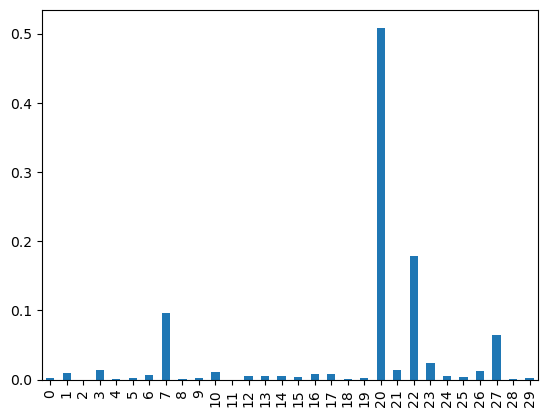

In [11]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns=range(30))
df['y'] = y

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Fit the classifier to the dataset
model.fit(X, y)

# Get the feature importances from the trained model
importances = model.feature_importances_

# Convert the importances to a pandas Series object
importances = pd.Series(importances, index=range(X.shape[1]))

# Visualize the feature importances using a bar chart
importances.plot.bar()

# 主成分分析 PCA

PCA（Principal Component Analysis）是一种常用的降维方法，它的原理是将高维数据映射到低维空间，同时保留数据的主要特征。具体来说，PCA通过线性变换将原始数据映射到一个新的坐标系中，使得新坐标系下的数据具有最大的方差。这个新坐标系的基向量称为主成分，每个主成分都是原始数据中的线性组合。PCA的目标是找到一组主成分，使得它们能够最大程度地解释原始数据的方差。

在PCA中，我们希望将原始数据映射到一个新的坐标系中，使得新坐标系下的数据具有最大的方差。这是因为方差是衡量数据分布的一种重要指标，它可以反映数据的离散程度。具有较大方差的特征可以提供更多的信息，因为它们具有更大的变化范围，可以更好地区分不同的样本。因此，我们希望在新坐标系中选择具有最大方差的特征，以便更好地解释原始数据的变化。

方差是衡量数据分布的一种重要指标，它可以反映数据的离散程度。方差越大，说明数据的分布越分散，即数据的变化范围越大。方差越小，说明数据的分布越集中，即数据的变化范围越小。在统计学中，方差是衡量随机变量离散程度的一种指标，它的计算公式为每个数据点与均值之差的平方和除以数据点的个数。

PCA的实现过程如下：

1. 对原始数据进行中心化，即将每个特征的均值减去整个特征的均值，使得每个特征的均值为0。
2. 计算协方差矩阵，即将每个特征与其他特征的相关性计算出来，得到一个方阵。
3. 对协方差矩阵进行特征值分解，得到特征值和特征向量。
4. 将特征向量按照对应的特征值大小进行排序，选择前k个特征向量作为主成分。
5. 将原始数据映射到新的坐标系中，即将每个样本点投影到前k个主成分上。

PCA的优点是可以减少数据的维度，去除冗余信息，提高模型的性能和泛化能力。此外，PCA还可以用于数据可视化和特征提取。

在下述代码中，PCA是使用`PCA()`创建的。该对象可以通过`fit`方法拟合到数据集上，并使用`explained_variance_ratio_`属性计算每个主成分的方差贡献率

Text(0, 0.5, 'Explained Variance')

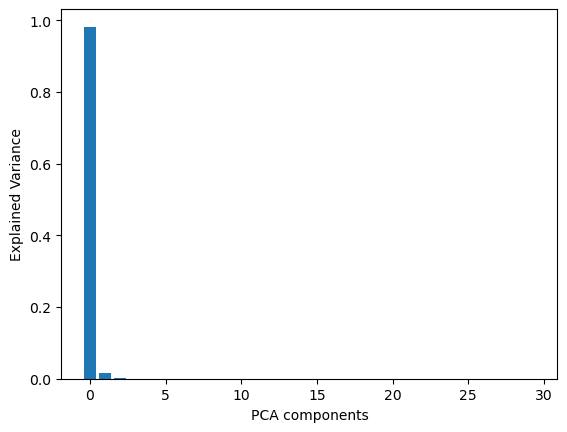

In [12]:
# Import necessary libraries
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns=range(30))
df['y'] = y

# Create a PCA object
pca = PCA()

# Fit the PCA object to the dataset
pca.fit(X)

# Visualize the explained variance ratio using a bar chart
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')

# ANOVA（Analysis of Variance）or F-test

ANOVA（Analysis of Variance）是一种常用的统计方法，它可以用来比较两个或多个样本之间的差异。具体来说，ANOVA将总体方差分解为组内方差和组间方差，然后计算组间方差与组内方差的比值，得到F值。F值越大，说明组间方差相对于组内方差的比值越大，即不同组之间的差异越显著。

在特征选择中，我们可以使用ANOVA方法来计算每个特征与目标变量之间的线性关系程度。具体来说，我们可以使用f_classif()函数来计算每个特征的F值和p值。F值可以用来衡量每个特征与目标变量之间的线性关系程度。F值越大，说明该特征与目标变量之间的线性关系越强。p值则用来衡量F值的显著性，p值越小，说明F值越显著，即该特征与目标变量之间的线性关系越强。

ANOVA的实现过程如下：

1. 计算每个样本的平均值和总体平均值。
2. 计算每个样本的平均值与总体平均值之差的平方和，得到总体平方和。
3. 将每个样本的平均值与总体平均值之差的平方和分解为组内平方和和组间平方和。
4. 计算组间平方和与组内平方和的比值，得到F值。
5. 根据F值和自由度计算p值。

总之，ANOVA方法可以用来比较两个或多个样本之间的差异，它将总体方差分解为组内方差和组间方差，然后计算组间方差与组内方差的比值，得到F值。在特征选择中，我们可以使用ANOVA方法来计算每个特征与目标变量之间的线性关系程度，以便我们选择最相关的特征。

<Axes: >

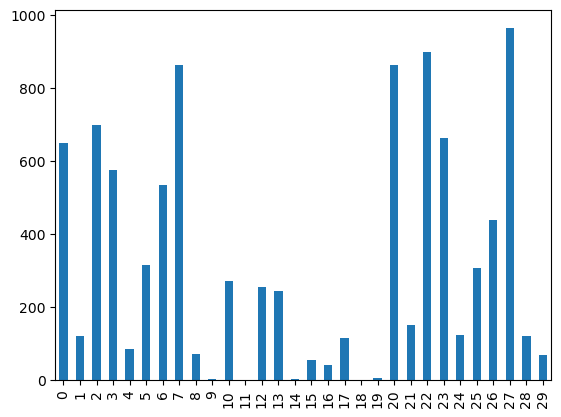

In [13]:
# Import necessary libraries
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns=range(30))
df['y'] = y

# Calculate the F-value and p-value for each feature
fval = f_classif(X, y)

# Convert the F-value to a pandas Series object
fval = pd.Series(fval[0], index=range(X.shape[1]))

# Visualize the F-value using a bar chart
fval.plot.bar()

# 卡方检验

卡方检验（Chi-Squared Test）是一种常用的统计方法，它可以用来检验两个变量之间是否存在相关性。在特征选择中，我们可以使用卡方检验来计算每个特征与目标变量之间的相关性程度，以便我们选择最相关的特征。

卡方检验的原理是比较实际观测值和理论预期值之间的差异。具体来说，我们可以将样本分成两个或多个组，然后计算每个组中实际观测值和理论预期值之间的差异。理论预期值是指在假设两个变量之间不存在相关性的情况下，每个组中每个取值的期望频率。然后，我们可以计算每个组中实际观测值和理论预期值之间的差异，并将这些差异的平方除以理论预期值，得到卡方值。卡方值越大，说明实际观测值和理论预期值之间的差异越大，即两个变量之间的相关性越强。

在卡方检验中，我们计算每个特征与目标变量之间的卡方值，卡方值越大，说明实际观测值和理论预期值之间的差异越大，即该特征与目标变量之间的相关性越强。因此，在特征选择中，我们可以使用卡方检验来计算每个特征与目标变量之间的相关性程度，以便我们选择最相关的特征。具体来说，我们可以计算每个特征的卡方值，并选择卡方值最大的特征作为最相关的特征。

<Axes: >

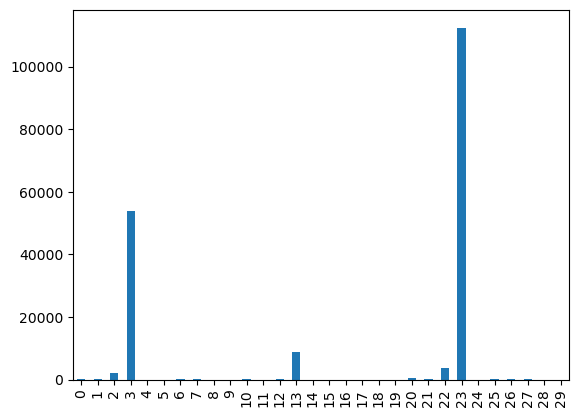

In [14]:
# Import necessary libraries
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns=range(30))
df['y'] = y

# Calculate the chi-squared statistic and p-value for each feature
chi_scores = chi2(X, y)

# Convert the chi-squared statistic to a pandas Series object
chi_scores = pd.Series(chi_scores[0], index=range(X.shape[1]))

# Visualize the chi-squared statistic using a bar chart
chi_scores.plot.bar()